<a href="https://colab.research.google.com/github/znumunz/dataviz2025/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **กลุ่มที่ 1**

# **สมาชิก**

*   นางสาวศศิวิมล ภาณุโชติ 663020040-8 เลขที่ 8
*   นายรุ่งแสง กองสุข 663020292-1 เลขที่ 20
*   นางสาวศิริวรรณ นวลวัน 663020585-6 เลขที่ 32
*   นายกฤตนัย วิเศษคร้อ 663020620-0 เลขที่ 35






# HW 4 (group) ยอดรวมทั้ง 5 เดือน เมืองไหนมีจำนวนผู้ถูกเรียกค้นที่เป็นคน Asia น้อยที่สุด และ มากที่สุด

## WH 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

# ฟังก์ชันอ่านไฟล์ทั้งหมด เก็บข้อมูลลง list ที่เพิ่มคอลัมน์ชื่อเมืองเข้าไป
def read_all_data(base_path):
    all_dfs = []  # สร้าง list เปล่าเพื่อเอาไว้เก็บไฟล์ทั้งหมด
    months = os.listdir(base_path)  # สร้างตัวแปรเพื่อเก็บโฟลเดอร์ดือนทั้งหมด

    for month in months:
        month_path = os.path.join(base_path, month) # เชื่อม basepath กับชื่อเดือนเป็นเส้นทางของแต่ละเดือน
        files = os.listdir(month_path) #สร้างตัวแปรเพื่อเก็บชื่อไฟล์ทั้งหมดที่อยู่ในเดือนนั้น
        for file in files:
            if 'stop-and-search' in file: #ดำเนินการเฉพาะไฟล์ 'stop-and-search' ทุกเมือง
                filepath = os.path.join(month_path, file) # สร้างไฟล์พาทที่มีไฟล์เฉพาะ stop-and-search
                df = pd.read_csv(filepath) # สร้าตัวแปรมารับตาราง
                city = file.replace('-stop-and-search.csv', '').split('-', 2)[-1] # เลือกมาแค่ชื่อเมือง
                df['Police Force'] = city # นำชื่อเมืองมาสร้างคอลัมน์ใหม่ใน df
                all_dfs.append(df) #เพิ่ม df ใน all_dfs

    return all_dfs #คืนค่าตารางทั้งหมดที่้พิ่มเข้ามาเรือยๆ

# ฟังก์ชันนับจำนวนคนเชื้อสายเอเชีย รวมทุกไฟล์
def count_asian_people(all_dfs):
    asian_counts = {}  # สร้าง dictionary ว่าง เพื่อเก็บจำนวนคนเชื้อสายเอเชียของแต่ละเมือง

    for df in all_dfs:  # วนลูปดูข้อมูลในแต่ละ DataFrame ที่เก็บมาใน list
        for i in range(len(df)):  # วนลูปทีละแถวใน DataFrame นั้น
            row = df.iloc[i]  # ดึงแถวที่ i ออกมาเป็น Series (เหมือน dictionary ของแต่ละแถว)
            ethnicity = str(row.get('Self-defined ethnicity', ''))  # อ่านคอลัมน์ 'Self-defined ethnicity' ของแถวนี้ ถ้าไม่มีให้เป็น '' (ค่าว่าง)

            if 'Asian' in ethnicity:  # ถ้าค่าในคอลัมน์นั้นมีคำว่า 'Asian' อยู่ (หมายถึงคนเชื้อสายเอเชีย)
                city = row['Police Force']  # อ่านชื่อเมืองจากคอลัมน์ 'Police Force' ของแถวนั้น

                if city not in asian_counts:  # ถ้าเมืองนี้ยังไม่เคยเจอใน dictionary
                    asian_counts[city] = 0     # สร้างค่าเริ่มต้นเป็น 0

                asian_counts[city] += 1  # เพิ่มจำนวนคนเชื้อสายเอเชียในเมืองนั้น 1 คน

    return asian_counts  # คืนค่า dictionary ที่เก็บจำนวนคนเชื้อสายเอเชียของแต่ละเมือง

# ส่วนหลักของโปรแกรม
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'

# อ่านข้อมูลจากไฟล์ทั้งหมด
dataframes = read_all_data(base_path)

# นับคนเชื้อสายเอเชียรวมทั้ง 5 เดือน
counts = count_asian_people(dataframes)

# หามากที่สุดและน้อยที่สุด
most_city = max(counts, key=counts.get)
fewest_city = min(counts, key=counts.get)

# แสดงผลทุกเมือง
print("รวมจำนวนการเรียกค้นผู้มีเชื้อสายเอเชียในแต่ละเมือง (รวม 5 เดือน):\n")
for city in sorted(counts, key=counts.get, reverse=True):
    print(f"{city}: {counts[city]}")

print("\n====== สรุป ======")
print(f"เมืองที่มีการเรียกค้นคนเชื้อสายเอเชียมากที่สุด: {most_city} ({counts[most_city]})")
print(f"เมืองที่มีการเรียกค้นคนเชื้อสายเอเชียน้อยที่สุด: {fewest_city} ({counts[fewest_city]})")


## ขั้นตอน

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
months = os.listdir(base_path)  # โฟลเดอร์เดือนทั้งหมด
months

In [ ]:
all_files = []

for month in months:
    month_path = os.path.join(base_path, month)
    files = os.listdir(month_path)
    for f in files:
        all_files.append(f)  # เก็บเดือนและชื่อไฟล์
all_files

In [ ]:
filepaths = []  # เปลี่ยนชื่อตัวแปรเพื่อความเข้าใจชัดเจน

for file in all_files:
    if 'stop-and-search' in file:
        filepath = os.path.join(month_path, file)
        filepaths.append(filepath)

# แสดงทั้งหมด
for path in filepaths:
    print(path)

In [ ]:
all_dfs = []

df = pd.read_csv(filepath) # สร้างตัวแปรมารับตาราง
city = file.replace('-stop-and-search.csv' , '').split(' - ', 2)[-1] # เลือกมาแค่ชื่อเมือง
df['Police Force'] = city # นำชื่อเมืองมาสร้างคอลัมน์ใหม่ใน df
all_dfs.append(df)
all_dfs

In [ ]:
all_dfs = []

df = pd.read_csv(filepath) # สร้างตัวแปรมารับตาราง
city = file.replace('-stop-and-search.csv' , '').split(' - ', 2)[-1] # เลือกมาแค่ชื่อเมือง
df['Police Force'] = city # นำชื่อเมืองมาสร้างคอลัมน์ใหม่ใน df
all_dfs.append(df)
all_dfs

In [ ]:
Ex = pd.concat(all_dfs, ignore_index=True)
Ex

In [ ]:
len(df)

In [ ]:
row = df.iloc[0]
row

In [ ]:
ethnicity = str(row.get('Self-defined ethnicity', ''))
ethnicity

In [ ]:
if 'Asian' in ethnicity:
                city = row['Police Force']
city

In [ ]:
asian_counts = {}
if city not in asian_counts:  # ถ้าเมืองนี้ยังไม่เคยเจอใน dictionary
    asian_counts[city] = 0     # สร้างค่าเริ่มต้นเป็น 0

asian_counts[city] += 1  # เพิ่มจำนวนคนเชื้อสายเอเชียในเมืองนั้น 1 คน

asian_counts  # คืนค่า dictionary ที่เก็บจำนวนคนเชื้อสายเอเชียของแต่ละเมือง

In [ ]:
most_city_Ex = max(asian_counts)
most_city_Ex

In [ ]:
most_city = max(asian_counts, key=asian_counts.get)
most_city

In [ ]:
asian_counts[most_city]

## สรุปผล

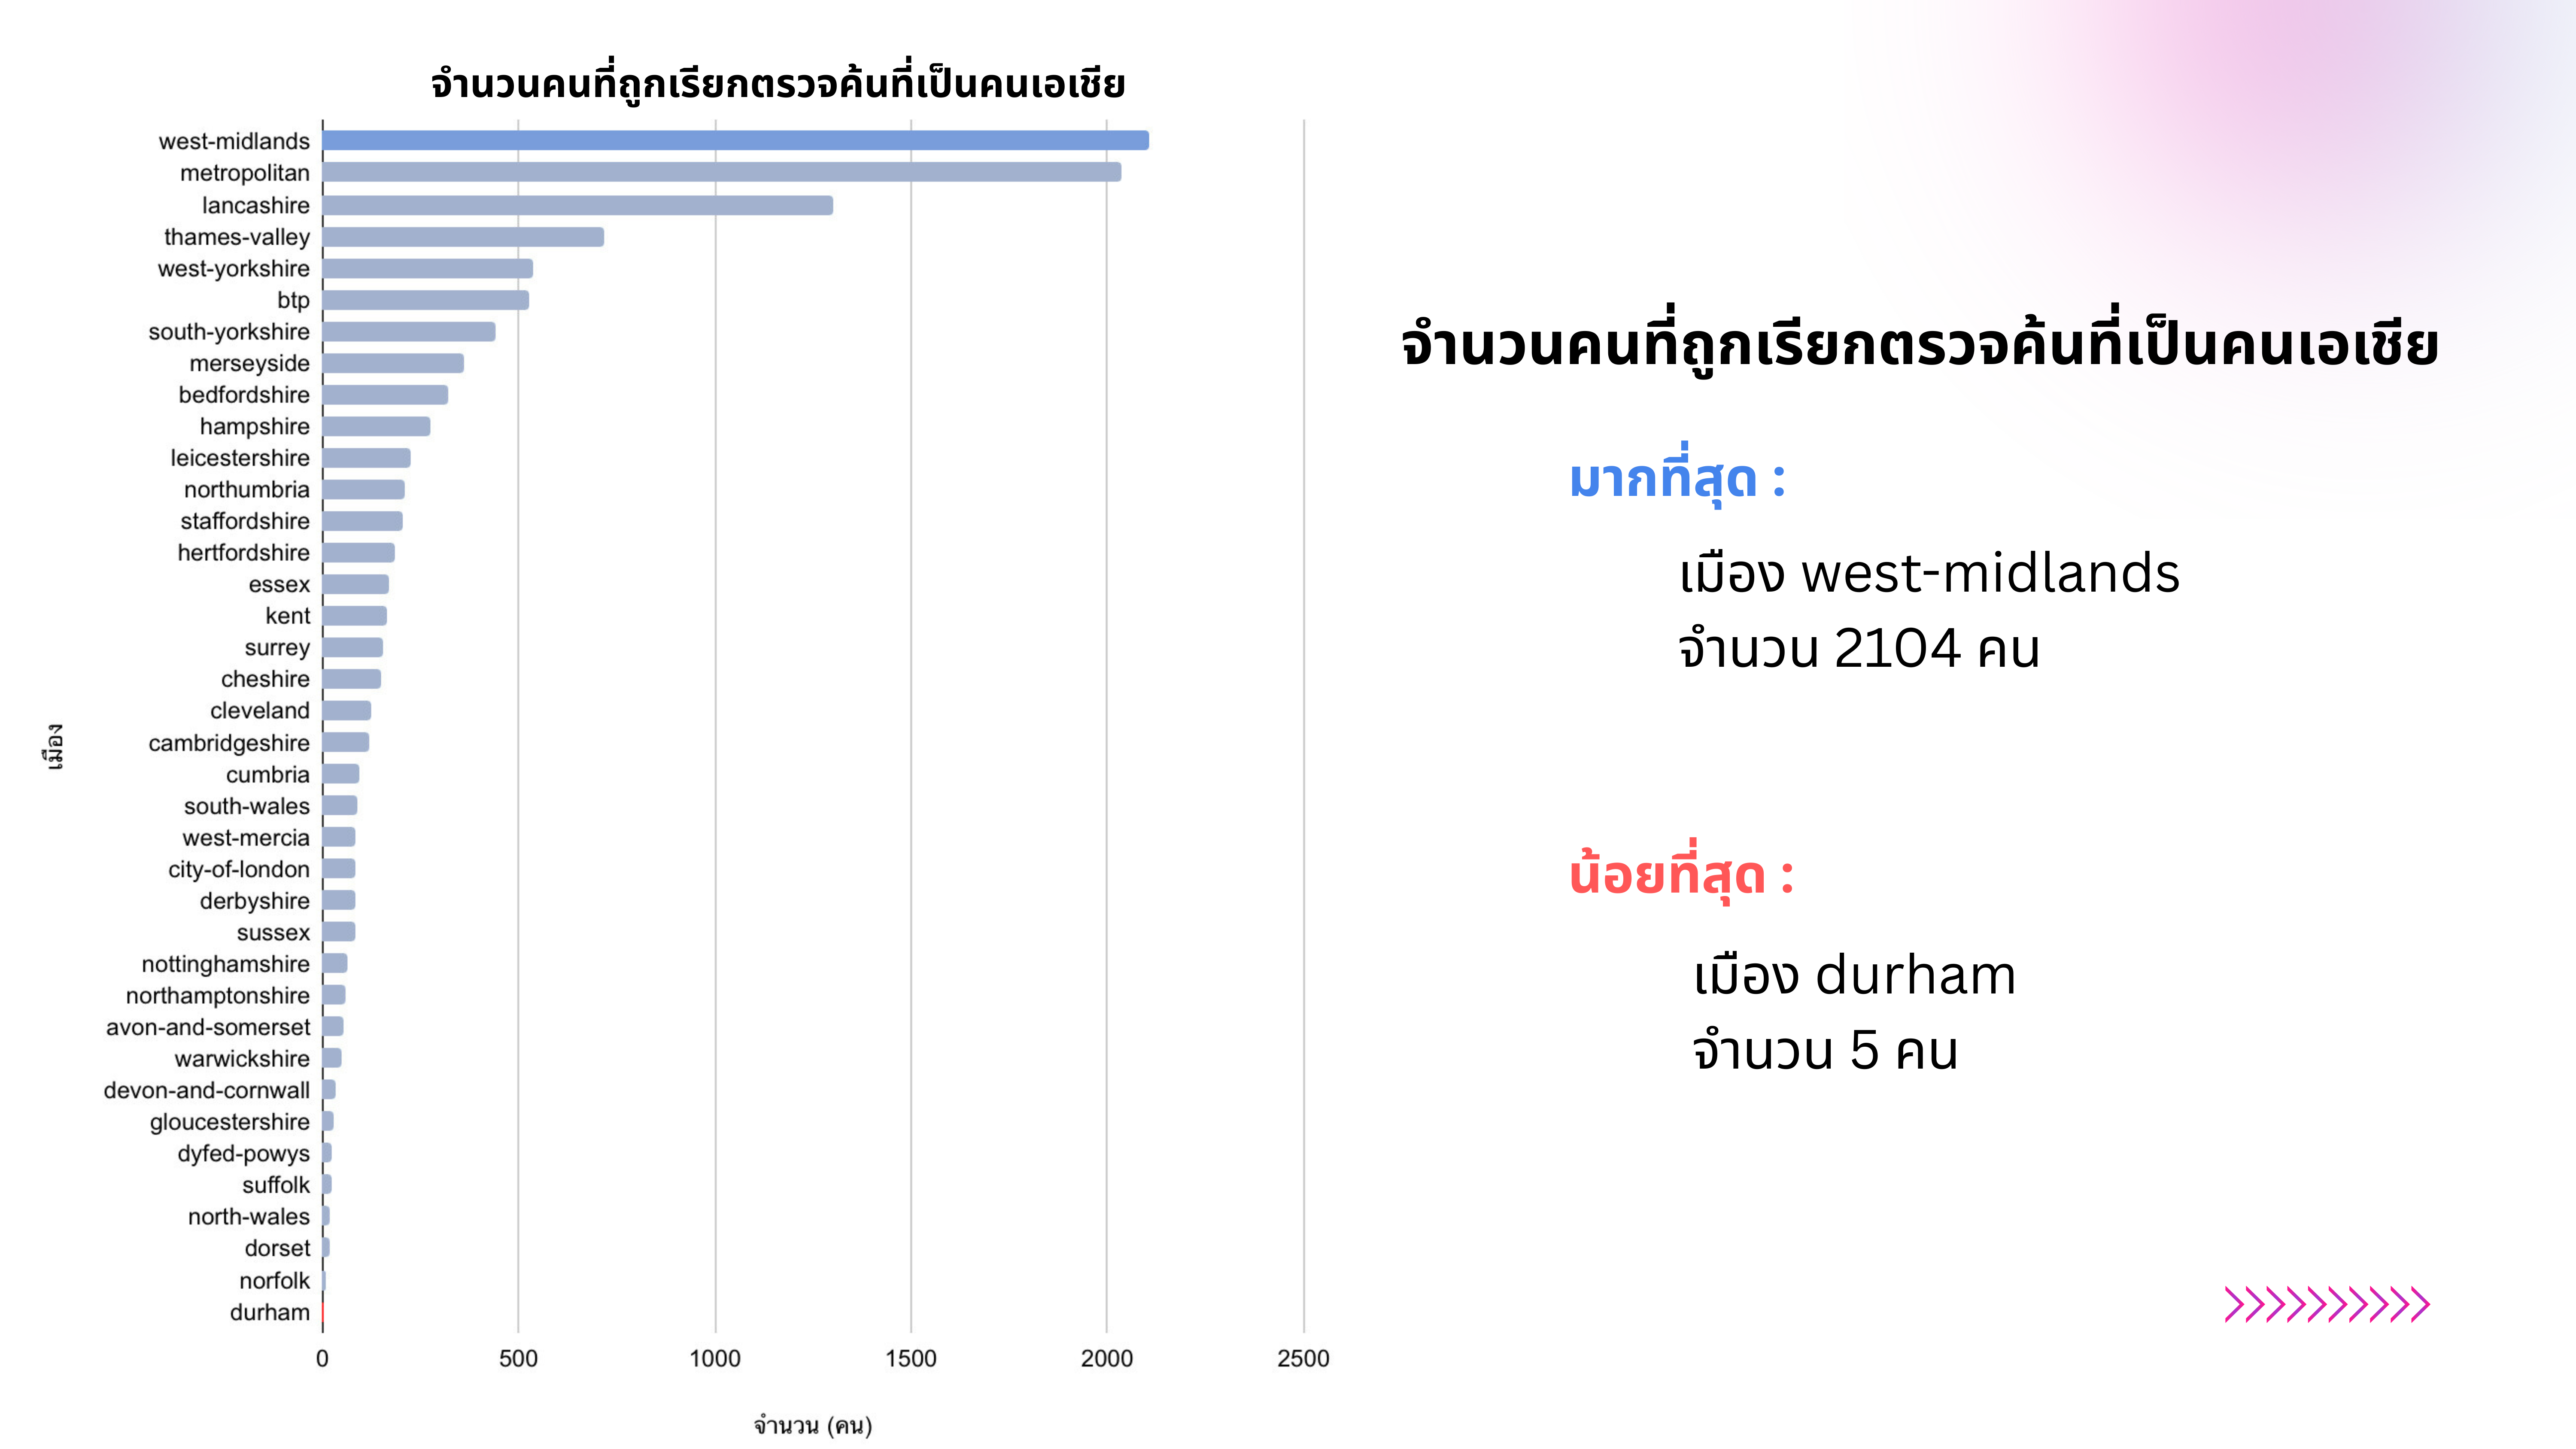

## ข้อมูลผู้ที่ถูกเรียกค้นที่มีเชื้อสายเอเชีย จำแนกเป็นรายเดือน 5 เดือน

In [ ]:
# Prompt

import pandas as pd
import os

# ระบุ base path และชื่อเมืองที่ต้องการ
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'
city = 'west-midlands'

# รายชื่อเดือนที่ต้องการตรวจสอบ
months = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

# เก็บผลลัพธ์แต่ละเดือน
monthly_counts = {}

# วนลูปแต่ละเดือน
for month in months:
    filepath = os.path.join(base_path, month, f"{month}-{city}-stop-and-search.csv")

    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        df['Police Force'] = city
        asian_df = df[df['Self-defined ethnicity'].astype(str).str.contains('Asian', na=False)]
        monthly_counts[month] = len(asian_df)
    else:
        monthly_counts[month] = 'ไม่มีข้อมูล'  # ถ้าไม่มีไฟล์ในเดือนนั้น

# แสดงผลลัพธ์
print(f"จำนวนผู้ที่ถูกเรียกค้ยที่มีเชื้อสายเอเชีย ในเมือง {city} รายเดือน:")
for month in months:
    print(f"{month}: {monthly_counts[month]} คน")


# คำนวณผลรวม
total = sum(count for count in monthly_counts.values() if isinstance(count, int))

# แสดงผลรวม
print(f"\nจำนวนผู้ที่ถูกเรียกค้นที่มีเชื้อสายเอเชียในเมือง {city} รวม 5 เดือน: {total} คน")















#กราฟ
# Prompt : สร้างเป็นกราฟนำเสนอข้อมูล



import matplotlib.pyplot as plt


# ดึงข้อมูลจาก dictionary มาแยกเป็นแกน X และ Y
months_list = list(monthly_counts.keys())
counts_list = [count if isinstance(count, int) else 0 for count in monthly_counts.values()]  # ใส่ 0 ถ้าเป็น 'ไม่มีข้อมูล'

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.bar(months_list, counts_list, color='skyblue')

# ใส่ชื่อกราฟและแกน
plt.title(f'Stop And Search (Asian), City : {city} Months (2025)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('จำนวนคน', fontsize=12)

# ใส่ค่าตัวเลขบนแท่งกราฟ
for i, value in enumerate(counts_list):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.ylim(0, max(counts_list) + 100)  # ขยายขอบบนของกราฟนิดหน่อย
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Prompt

import pandas as pd
import os

# ระบุ base path และชื่อเมืองที่ต้องการ
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'
city = 'durham'

# รายชื่อเดือนที่ต้องการตรวจสอบ
months = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

# เก็บผลลัพธ์แต่ละเดือน
monthly_counts = {}

# วนลูปแต่ละเดือน
for month in months:
    filepath = os.path.join(base_path, month, f"{month}-{city}-stop-and-search.csv")

    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
        df['Police Force'] = city
        asian_df = df[df['Self-defined ethnicity'].astype(str).str.contains('Asian', na=False)]
        monthly_counts[month] = len(asian_df)
    else:
        monthly_counts[month] = 'ไม่มีข้อมูล'  # ถ้าไม่มีไฟล์ในเดือนนั้น

# แสดงผลลัพธ์
print(f"จำนวนผู้ที่ถูกเรียกค้ยที่มีเชื้อสายเอเชีย ในเมือง {city} รายเดือน:")
for month in months:
    print(f"{month}: {monthly_counts[month]} คน")


# คำนวณผลรวม
total = sum(count for count in monthly_counts.values() if isinstance(count, int))

# แสดงผลรวม
print(f"\nจำนวนผู้ที่ถูกเรียกค้นที่มีเชื้อสายเอเชียในเมือง {city} รวม 5 เดือน: {total} คน")















#กราฟ
# Prompt : สร้างเป็นกราฟนำเสนอข้อมูล



import matplotlib.pyplot as plt


# ดึงข้อมูลจาก dictionary มาแยกเป็นแกน X และ Y
months_list = list(monthly_counts.keys())
counts_list = [count if isinstance(count, int) else 0 for count in monthly_counts.values()]  # ใส่ 0 ถ้าเป็น 'ไม่มีข้อมูล'

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.bar(months_list, counts_list, color='skyblue')

# ใส่ชื่อกราฟและแกน
plt.title(f'Stop And Search (Asian), City : {city} Months (2025)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('จำนวนคน', fontsize=12)

# ใส่ค่าตัวเลขบนแท่งกราฟ
for i, value in enumerate(counts_list):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.ylim(0, max(counts_list) + 6)  # ขยายขอบบนของกราฟนิดหน่อย
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## ตรวจสอบว่า แต่ละเมือง มีไฟล์ข้อมูล ครบทั้ง 5 เดือนไหม

In [ ]:
import os

# base path และรายชื่อเดือน
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'
months = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

# ตรวจสอบและแสดงผลลัพธ์
print("📊 จำนวนไฟล์ข้อมูล stop-and-search ในแต่ละเดือน:\n")

for month in months:
    month_path = os.path.join(base_path, month)

    if os.path.exists(month_path):
        files = [f for f in os.listdir(month_path) if f.endswith('-stop-and-search.csv')]
        city_names = [f.replace(f"{month}-", '').replace('-stop-and-search.csv', '') for f in files]
        print(f"{month}: {len(files)} เมือง")
        print(f"เมืองที่มีข้อมูล: {', '.join(sorted(city_names))}\n")
    else:
        print(f"{month}: ❌ ไม่พบโฟลเดอร์เดือนนี้\n")


In [ ]:
import os
import pandas as pd

# กำหนด base path และช่วงเดือน
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'
months = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

# สร้าง list ของเมืองจากชื่อไฟล์ในเดือน 2025-01 (หรือโฟลเดอร์ใดก็ได้ที่มีข้อมูลครบ)
sample_month = '2025-01'
sample_path = os.path.join(base_path, sample_month)
all_files = [f for f in os.listdir(sample_path) if f.endswith('-stop-and-search.csv')]
cities = [f.replace(f"{sample_month}-", '').replace('-stop-and-search.csv', '') for f in all_files]

# สร้าง DataFrame เปล่าเพื่อเก็บผลลัพธ์
status_df = pd.DataFrame(index=cities, columns=months)

# ตรวจสอบไฟล์ของแต่ละเมืองในแต่ละเดือน
for city in cities:
    for month in months:
        filepath = os.path.join(base_path, month, f"{month}-{city}-stop-and-search.csv")
        if os.path.exists(filepath):
            status_df.loc[city, month] = '✅'
        else:
            status_df.loc[city, month] = '❌'

# แสดงตารางสรุปสถานะ
print("📋 สถานะไฟล์ข้อมูล stop-and-search ของแต่ละเมืองในแต่ละเดือน:\n")
print(status_df)

# ถ้าอยาก export เป็น Excel:
# status_df.to_excel('/content/สถานะไฟล์ข้อมูลแต่ละเมือง.xlsx')

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# ระบุ base path และชื่อ 2 เมืองที่ต้องการเปรียบเทียบ
base_path = '/content/drive/MyDrive/MyPython&DataViz2025/Data/'
city1 = 'metropolitan'
city2 = 'west-midlands'

# รายชื่อเดือนที่ต้องการตรวจสอบ
months = ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

# ฟังก์ชันนับคนเชื้อสายเอเชียต่อเมือง
def count_asian_by_city(city):
    counts = {}
    for month in months:
        filepath = os.path.join(base_path, month, f"{month}-{city}-stop-and-search.csv")
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            df['Police Force'] = city
            asian_df = df[df['Self-defined ethnicity'].astype(str).str.contains('Asian', na=False)]
            counts[month] = len(asian_df)
        else:
            counts[month] = 0  # ถ้าไม่มีไฟล์ ให้ใส่ 0
    return counts

# เรียกใช้ฟังก์ชัน
counts1 = count_asian_by_city(city1)
counts2 = count_asian_by_city(city2)

# แสดงผลรายเดือน
print(f"จำนวนผู้ที่ถูกเรียกค้นที่มีเชื้อสายเอเชีย รายเดือน (หน่วย: คน):\n")
print(f"{'เดือน':<10} {city1:<15} {city2:<15}")
for month in months:
    print(f"{month:<10} {counts1[month]:<15} {counts2[month]:<15}")

# คำนวณผลรวม
total1 = sum(counts1.values())
total2 = sum(counts2.values())
print(f"\nรวม 5 เดือน:")
print(f"{city1}: {total1} คน")
print(f"{city2}: {total2} คน")

# ====== สร้างกราฟเปรียบเทียบ ======
x = range(len(months))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], [counts1[m] for m in months], width=width, label=city1, color='skyblue')
plt.bar([i + width/2 for i in x], [counts2[m] for m in months], width=width, label=city2, color='orange')

plt.xticks(ticks=x, labels=months)
plt.xlabel("Month")
plt.ylabel("Stop And Search (Asian)")
plt.title("Stop-and-Search: Asian Ethnicity Comparison Between Two Cities (2025)")
plt.legend()

# ใส่ค่าตัวเลขบนแท่งกราฟ
for i in x:
    plt.text(i - width/2, counts1[months[i]] + 10, str(counts1[months[i]]), ha='center', fontsize=9)
    plt.text(i + width/2, counts2[months[i]] + 10, str(counts2[months[i]]), ha='center', fontsize=9)

plt.ylim(0, max(max(counts1.values()), max(counts2.values())) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
